In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import cmath
import csv

from pylab import *
import matplotlib.colors as mcolors


In [2]:
# 定义需要拟合的函数
def func_t(x, f1re, f2re, kre, Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*np.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    t_up = (W_3*2*np.cos(2*yita) - (W_1)-(W_2))*Tao1
    t_down = W_2 * W_1 - (W_3)**2
    ft = t_up / t_down + 1
    return ft

In [3]:
def func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*np.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_1)*np.exp(-2j*yita) + (W_2)*np.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return fr

In [4]:
def func_r22(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*np.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_2)*np.exp(-2j*yita) + (W_1)*np.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return fr

In [28]:
def func_Z(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    # 微波书上
    S11 = func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    S22 = func_r22(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    S12 = func_t(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)

    # S11 = abs(S11)
    # S22 = abs(S22)
    # S12 = abs(S12)

    a = (1+S11)*(1-S22)
    adown = (1-S11)*(1-S22)
    b = S12**2
    Z_c = 1
    Z11 = (a+b) / (adown-b)

    Z21 = 2*S12 / (adown-b)

    Zin = 1 / (1/Z11 + 1)
    return Zin

In [78]:
def func_Z(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    # 超材料 论文
    S11 = func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    S22 = func_r22(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    S12 = func_t(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)

    a = (1+S11)**2
    adown = (1-S11)**2
    b = S12**2

    Z11 = (a-b) / (adown-b)

    return Z11

In [11]:
def func_CorY(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    # ABCD
    S11 = func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    S22 = func_r22(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    S12 = func_t(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)

    down = 2*S12
    up = (1-S11)*(1-S12) - S12**2
    Y = up / down
    Z = down / up

    Zin = 1 / (1/Z + 1)
    return Zin


In [ ]:
xdata = np.arange(4.2, 5.0, 0.001)

In [ ]:
# b0 = popt
plt.figure(dpi=300)
plt.title("All S parameters", size=10)

b0 = [4.3 ,4.38204441 ,-0.40055284 ,0.043, 0.0479, 1.13410579, 1.9141567]

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 10}

plt.plot(xdata, abs(func_r(xdata, *b0)), 'r-', label='CMT r', linewidth=1)
plt.plot(xdata, abs(func_t(xdata, *b0)), 'b-', label='CMT t', linewidth=1)
plt.plot(xdata, abs(func_r22(xdata, *b0)), 'g-', label='CMT S_22', linewidth=1)
# plt.plot(xdata[::30], tdata[::30], 'bo', label='Sim. t', markersize=2, markerfacecolor='none')
plt.legend(prop=font2, frameon=False)#设置 图例

plt.xlabel('Frequency (GHz)', fontdict=font1) # 设置 坐标名称
plt.ylabel('S Parameters', fontdict=font1)

plt.xlim(4.2, 5.0) #设置 坐标轴范围
plt.ylim(0.0, 1.0)
my_x_ticks = np.arange(4.3, 4.9, 0.2) #设置 坐标刻度间隔
my_y_ticks = np.arange(0, 1.1, 0.2)

plt.tick_params(axis='both',which='major',labelsize=9,direction='in',color='black') #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 7)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 7)
# plt.grid()

plt.show()


In [ ]:

plt.title("Impedance", size=10)

b0 = [4.3 ,4.38204441 ,-0.40055284 ,0.043, 0.0479, 1.13410579, 1.9141567]

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 10}

plt.plot(xdata, abs(func_Z(xdata, *b0)), 'r-', label='CMT Z', linewidth=1)

# plt.plot(xdata[::30], tdata[::30], 'bo', label='Sim. t', markersize=2, markerfacecolor='none')
plt.legend(prop=font2, frameon=False)#设置 图例

plt.xlabel('Frequency (GHz)', fontdict=font1) # 设置 坐标名称
plt.ylabel('Impedance ($\Omega$)', fontdict=font1)

plt.xlim(4.2, 5.0) #设置 坐标轴范围
plt.ylim(0.0, 1200)
my_x_ticks = np.arange(4.3, 4.9, 0.2) #设置 坐标刻度间隔
my_y_ticks = np.arange(0, 1300, 200)

plt.tick_params(axis='both',which='major',labelsize=9,direction='in',color='black') #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 7)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 7)
# plt.grid()

plt.show()

In [7]:
def f_para_c2f(L, C, x):
    return (L*(C+x))**(-1/2)

In [36]:
xi = np.linspace(0.2, 2.2, 200)
yi = np.linspace(0.2, 2.2, 200)
c1,c2 = np.meshgrid(xi,yi)

L1, C1 = 0.0102, 4.177
L2, C2 = 0.01712, 1.465
f1 = f_para_c2f(L1, C1, c1)
f2 = f_para_c2f(L2, C2, c2)

d = 1.369 + 0.6653*c1 + (-0.5138)*c2
yita = 1.045 + 0.1437*c1 + 0.6983*c2
k = 0.2127 + 0.08791*c1 + (0.07889)*c2
T1 = 0.043
T2 = 0.048

In [89]:
# f1 = f_para_c2f(L1, C1, 0.4)
# f2 = f_para_c2f(L2, C2, 0.58)
# c1,c2 = 0.4, 0.58
# d = 1.369 + 0.6653*c1 + (-0.5138)*c2
# yita = 1.045 + 0.1437*c1 + 0.6983*c2
# k = 0.2127 + 0.08791*c1 + (0.07889)*c2
# T1 = 0.043
# T2 = 0.048
# ans = func_Z(f, f1, f2, k, T1, T2, d, yita)
# print(abs(ans))

0.5097963967994936


In [37]:
f = 4.72 # 工作频率 （GHz)

r = np.real(func_Z(f, f1, f2, k, T1, T2, d, yita))
y = np.imag(func_Z(f, f1, f2, k, T1, T2, d, yita))
z = abs(func_Z(f, f1, f2, k, T1, T2, d, yita))
# z = abs(func_CorY(f, f1, f2, k, T1, T2, d, yita))
theta = np.angle(func_Z(f, f1, f2, k, T1, T2, d, yita))

In [ ]:
cmap = cm.get_cmap("jet") #rainbow
norm = mcolors.Normalize(vmin=0, vmax=1)

# fig = plt.figure(figsize=(6,4))
pcolor(c1,c2,r,cmap = cmap)

plt.title('Impedance(R)', size=28, family='Arial')

ax = plt.gca()
ax.set_xlabel("$C_1$ (pF)",fontsize=20,family='Arial')
ax.set_ylabel("$C_2$ (pF)",fontsize=20,family='Arial')

my_x_ticks = np.arange(0.4, 2.2, 0.45) #设置 坐标刻度间隔
my_y_ticks = np.arange(0.4, 2.2, 0.45)

plt.tick_params(axis='both',which='major',labelsize=20,direction='in',color='white',top=True,right=True) #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 14)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 14)

clim([0.5,1.5])
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)  #设置色标刻度字体大小。
# cb.set_ticks(np.linspace(0,1,6))
# cb.set_ticklabels(('0', '0.2', '0.4', '0.6', '0.8',  '1'))

plt.show()

In [ ]:
cmap = cm.get_cmap("jet") #rainbow
norm = mcolors.Normalize(vmin=0, vmax=1)

# fig = plt.figure(figsize=(6,4))
pcolor(c1,c2,y,cmap = cmap)

plt.title('Impedance(X)', size=28, family='Arial')

ax = plt.gca()
ax.set_xlabel("$C_1$ (pF)",fontsize=20,family='Arial')
ax.set_ylabel("$C_2$ (pF)",fontsize=20,family='Arial')

my_x_ticks = np.arange(0.4, 2.2, 0.45) #设置 坐标刻度间隔
my_y_ticks = np.arange(0.4, 2.2, 0.45)

plt.tick_params(axis='both',which='major',labelsize=20,direction='in',color='white',top=True,right=True) #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 14)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 14)

clim([0,2])
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)  #设置色标刻度字体大小。
# cb.set_ticks(np.linspace(0,1,6))
# cb.set_ticklabels(('0', '0.2', '0.4', '0.6', '0.8',  '1'))

plt.show()

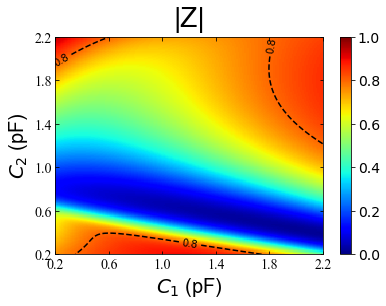

In [38]:
cmap = cm.get_cmap("jet") #rainbow
mynorm = mcolors.Normalize(vmin=0, vmax=1)
# mynorm = mcolors.LogNorm(vmin=z.min(), vmax=z.max())
# fig = plt.figure(figsize=(6,4))

pcolor(c1,c2,z,norm=mynorm,cmap = cmap)
plt.title('|Z|', size=28, family='Arial', pad=10)

ax = plt.gca()
ax.set_xlabel("$C_1$ (pF)",fontsize=20,family='Arial')
ax.set_ylabel("$C_2$ (pF)",fontsize=20,family='Arial')

my_x_ticks = np.arange(0.2, 2.21, 0.4) #设置 坐标刻度间隔
my_y_ticks = np.arange(0.2, 2.21, 0.4)

plt.tick_params(axis='both',which='major',labelsize=20,direction='in',color='black',top=True,right=True) #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 14)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 14)

cb = plt.colorbar()
# cb = plt.colorbar(format='%.2f',ticks=plt.LogLocator(base=10, subs=[1.0])) #设置cbar刻度

cb.ax.tick_params(labelsize=14)  #设置色标刻度字体大小。
# cb.set_ticks(plt.LogLocator(base=10, subs=[1.0]))
# cb.set_ticklabels(('0.01', '0.1', '1', '4'))
cs = contour(c1,c2,z,[0.8],colors='black',linestyles='--')   #画等高线
plt.clabel(cs,fontsize=10,colors='black',fmt='%1.1f',inline_spacing=2) #标注等高线
plt.show()

In [ ]:
cmap = cm.get_cmap("jet") #rainbow
norm = mcolors.Normalize(vmin=0, vmax=1)

# fig = plt.figure(figsize=(6,4))
pcolor(c1,c2,theta,cmap = cmap)

plt.title('phase', size=28, family='Arial')

ax = plt.gca()
ax.set_xlabel("$C_1$ (pF)",fontsize=20,family='Arial')
ax.set_ylabel("$C_2$ (pF)",fontsize=20,family='Arial')

my_x_ticks = np.arange(0.2, 2.2, 0.4) #设置 坐标刻度间隔
my_y_ticks = np.arange(0.2, 2.2, 0.4)

plt.tick_params(axis='both',which='major',labelsize=20,direction='in',color='white',top=True,right=True) #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 14)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)  #设置色标刻度字体大小。
# cb.set_ticks(np.linspace(0,1,6))
# cb.set_ticklabels(('0', '0.2', '0.4', '0.6', '0.8',  '1'))

plt.show()